# International football results from 1872 to 2021

### Conteúdo do dataset
Este dataset contém 43.170 resultados de partidas de futebol iniciando desde os primeiros jogos oficiais até os jogos atuais. O dataset abrange partidas oficiais e também partidas amistosas.O dataset não contém resultados dos jogos olímpicos.

### Objetivo desde notebook
Este notebook tem o objetivo de fazer uma análise exploratória dos dados, vamos responder algumas perguntas como:



## 1. Análise exploratória

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
data = pd.read_csv('dados/results.csv')

In [6]:
data.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [12]:
data['year'] = data['date'].str.extract('([0-9]+)\-', expand=False)

In [15]:
data.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876


In [18]:
data = data.sort_values(by='date')

In [28]:
data.iloc[0:50]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,1876
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,1877
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,1877
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,1878
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,1878


Os primeiros cinco jogos oficiais foram disputados entre Scotland e England. Somente a partir do jogo 42 que aconteceu outra partida que não envolvesse Nothern Ireland, England, Scotland e Wales.

#### 1. Os países que mais jogaram na história

In [60]:
home = data.home_team.value_counts().to_frame()
away = data.away_team.value_counts().to_frame()

In [61]:
home['away_qtd'] = away
total = home

In [65]:
total.reset_index(inplace=True)
total.rename(columns={'index': 'country', 'home_team': 'home_qtd'}, inplace = True)

In [ ]:
total.away_qtd.fillna(0, inplace=True)

In [78]:
# Estes são os países que mais jogaram jogos como mandantes na história.
total.head(15)

,country,home_qtd,away_qtd
0,Brazil,586,421.0
1,Argentina,561,442.0
2,Mexico,529,369.0
3,Germany,521,453.0
4,England,516,520.0
5,Sweden,501,542.0
6,France,496,368.0
7,South Korea,489,401.0
8,Hungary,470,486.0
9,Italy,461,366.0


In [77]:
#Estes são os países que mais jogaram jogos como visitantes na história
total.sort_values(by='away_qtd', ascending=False).head(15)

,country,home_qtd,away_qtd
26,Uruguay,355,551.0
5,Sweden,501,542.0
4,England,516,520.0
8,Hungary,470,486.0
65,Paraguay,272,466.0
3,Germany,521,453.0
18,Poland,397,442.0
1,Argentina,561,442.0
42,Zambia,310,431.0
31,Finland,340,428.0


In [80]:
total['total'] = total.loc[total['home_qtd'] >= 0,['home_qtd','away_qtd']].sum(axis=1)

In [83]:
#Estes são os países que mais jogaram jogos na história
total.sort_values(by='total', ascending=False).head(15)

,country,home_qtd,away_qtd,total
5,Sweden,501,542.0,1043.0
4,England,516,520.0,1036.0
0,Brazil,586,421.0,1007.0
1,Argentina,561,442.0,1003.0
3,Germany,521,453.0,974.0
8,Hungary,470,486.0,956.0
26,Uruguay,355,551.0,906.0
2,Mexico,529,369.0,898.0
7,South Korea,489,401.0,890.0
6,France,496,368.0,864.0


#### 2. Os anos que mais tiverem partidas de futebol

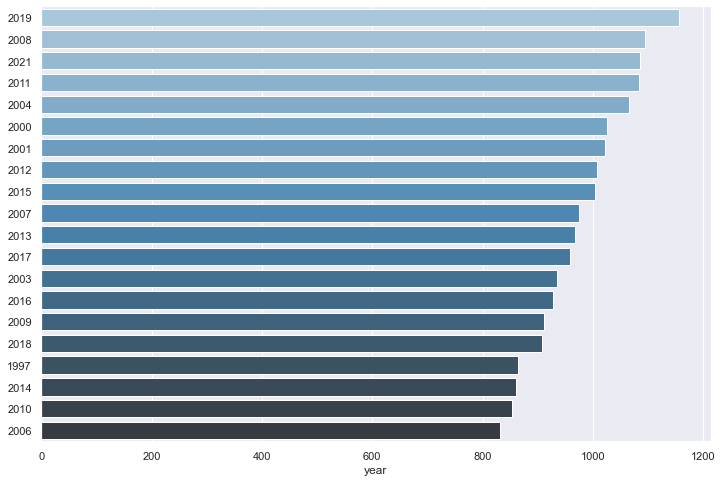

In [102]:
sns.set(rc={'figure.figsize':(12,8)})
dfYear = data['year'].value_counts()[0:20]
ax = sns.barplot(x=data['year'].value_counts()[0:20], y=dfYear.index, data=data, palette="Blues_d")

#### 3. Jogos com as maiores quantidades de gols em partidas oficiais

In [130]:
data['qtd_gols'] = data.loc[data['tournament'] != 'Friendly', ['home_score', 'away_score']].sum(axis=1)

In [132]:
data[['home_team', 
      'away_team', 
      'home_score', 
      'away_score', 
      'date', 
      'qtd_gols',
      'tournament'
     ]].sort_values(by='qtd_gols', ascending=False).head(20)

,home_team,away_team,home_score,away_score,date,qtd_gols,tournament
23923,Australia,American Samoa,31,0,2001-04-11,31.0,FIFA World Cup qualification
7975,Tahiti,Cook Islands,30,0,1971-09-13,30.0,South Pacific Games
11068,Fiji,Kiribati,24,0,1979-08-30,24.0,South Pacific Games
28959,Sápmi,Monaco,21,1,2006-11-24,22.0,Viva World Cup
23920,Australia,Tonga,22,0,2001-04-09,22.0,FIFA World Cup qualification
6125,Libya,Oman,21,0,1966-04-03,21.0,Arab Cup
27500,Guam,North Korea,0,21,2005-03-11,21.0,EAFF Championship
22694,Kuwait,Bhutan,20,0,2000-02-14,20.0,AFC Asian Cup qualification
25826,Sark,Isle of Wight,0,20,2003-06-30,20.0,Island Games
36157,Darfur,Padania,0,20,2014-06-01,20.0,CONIFA World Football Cup


#### 4. Partidas com as maiores quantidades de gols em Copas do Mundo

In [138]:
data['qtd_gols'] = data.loc[data['tournament'] == 'FIFA World Cup', ['home_score', 'away_score']].sum(axis=1)

In [139]:
data.qtd_gols.fillna(0, inplace=True)

In [140]:
data[['home_team', 
      'away_team', 
      'home_score', 
      'away_score', 
      'date', 
      'qtd_gols',
      'tournament'
     ]].sort_values(by='qtd_gols', ascending=False).head(20)

,home_team,away_team,home_score,away_score,date,qtd_gols,tournament
3682,Switzerland,Austria,5,7,1954-06-26,12.0,FIFA World Cup
2104,Brazil,Poland,6,5,1938-06-05,11.0,FIFA World Cup
3676,Germany,Hungary,3,8,1954-06-20,11.0,FIFA World Cup
12399,Hungary,El Salvador,10,1,1982-06-15,11.0,FIFA World Cup
4375,France,Paraguay,7,3,1958-06-08,10.0,FIFA World Cup
9119,Yugoslavia,DR Congo,9,0,1974-06-18,9.0,FIFA World Cup
4405,France,Germany,6,3,1958-06-28,9.0,FIFA World Cup
3679,Germany,Turkey,7,2,1954-06-23,9.0,FIFA World Cup
3669,Hungary,South Korea,9,0,1954-06-17,9.0,FIFA World Cup
1324,Argentina,Mexico,6,3,1930-07-19,9.0,FIFA World Cup


In [145]:
data.drop(columns=['qtd_gols'], inplace=True)

#### 5. Países que mais fizeram gols em Copas do Mundo

In [161]:
home = data.loc[data.tournament == 'FIFA World Cup', ['home_team', 'home_score']]
away = data.loc[data.tournament == 'FIFA World Cup', ['away_team', 'away_score']]

In [167]:
home = home.groupby("home_team")["home_score"].count().to_frame()
away = away.groupby("away_team")["away_score"].count().to_frame()

In [172]:
home['away_score'] = away
total = home

In [173]:
total.reset_index(inplace=True)

In [175]:
total.rename(columns={'home_team': 'country'}, inplace = True)

In [177]:
total['total_gols'] = total.loc[total['home_score'] >= 0, ['home_score', 'away_score']].sum(axis=1)

In [180]:
total.drop(columns=['home_score', 'away_score'], inplace=True)

In [182]:
total.sort_values(by='total_gols', ascending=False).head(25)

,country,total_gols
8,Brazil,109.0
28,Germany,109.0
38,Italy,83.0
2,Argentina,81.0
25,England,69.0
26,France,66.0
66,Spain,63.0
42,Mexico,57.0
76,Uruguay,56.0
67,Sweden,51.0


#### 6. Cidades que mais receberam partidas oficiais e não oficiais

In [184]:
data.city.value_counts().to_frame().head(10)

,city
Kuala Lumpur,667
Doha,490
Bangkok,427
London,416
Budapest,404
Montevideo,358
Kuwait City,349
Vienna,344
Copenhagen,336
Glasgow,334


#### 7. Cidades que mais receberam partidas oficiais

In [187]:
data2 = data.loc[data['tournament'] != 'Friendly', 'city']

In [189]:
data2.value_counts().to_frame().head(10)

,city
Kuala Lumpur,607
Bangkok,366
Doha,293
Montevideo,260
Belfast,245
Glasgow,243
Buenos Aires,235
Kuwait City,218
Seoul,212
Santiago,212


#### 8. Países que mais receberam partidas oficiais e não oficiais

In [190]:
data.country.value_counts().to_frame().head(10)

,country
United States,1237
France,818
Malaysia,744
England,717
Sweden,655
Germany,602
Brazil,567
Qatar,546
Spain,541
United Arab Emirates,532


#### 9. Países que mais receberam partidas oficiais

In [191]:
data2 = data.loc[data['tournament'] != 'Friendly', 'country']
data2.value_counts().to_frame().head(10)

,country
Malaysia,657
United States,584
England,431
Thailand,409
South Africa,400
Sweden,394
Brazil,373
France,347
South Korea,335
Qatar,335


In [192]:
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876
